# Worksheet 12

Name: Themistoklis Nikas

UID: U91062110 

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

It is a classificaiton task. We can denote that they are getting a job with 1 and that they aren't with 0.

It is not a classification task as there might be infinite number of months in order to be offered a job.

It is a multilabel classification task.

It is not a classification task.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

We can randomly split the given dataset into two sub datasets, train and test. We will train our model on train dataset and test it on test respectively.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting is like having a model that's too simple and doesn't understand the data well. It performs poorly on both training and test data and the error is high in both.

Overfitting is having a model that's too complicated. It actually memorizes the training data. Therefore, it does great on training data but fails on test data. We would expect low training error but high errors on new data, i.e., test data.

### K Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

/Users/themistoklis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/themistoklis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

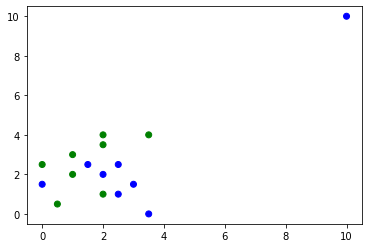

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

From the scatter plot above it is evident that the point on the top right corner is outlier. We will remove that (it is the lasst point in the nd array).

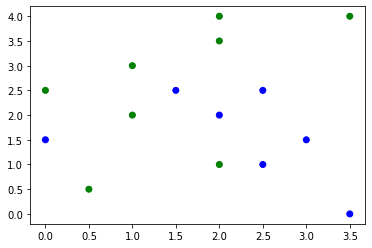

In [3]:
# remove top rigth point from ndarray
data['Attribute A'] = np.delete(data['Attribute A'], -1)
data['Attribute B'] = np.delete(data['Attribute B'], -1)
data['Class'] = np.delete(data['Class'], -1)
#plot again
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

There are many ways to approach this question. However, blue point at (0, 1.5) definitely is a noise point and should have been assigned to the green class. Now, green point at (2, 1) also seems to be a noise point. Most likely, blue point at (1.5, 2.5) is also a noise point.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

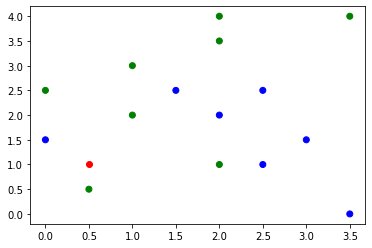

In [4]:
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.scatter(0.5, 1, color='r')
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

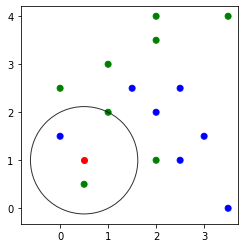

In [5]:
def n_closest_to(example, n):
    distances = np.sqrt((data['Attribute A'] - example[0])**2 + (data['Attribute B'] - example[1])**2)
    return np.argsort(distances)[:n]

location = ( 0.5 , 1 )
closest_points = n_closest_to(location, 3)
radius = np.sqrt((data['Attribute A'][closest_points[2]] - location[0])**2 + (data['Attribute B'][closest_points[2]] - location[1])**2)
_, axes = plt.subplots()
axes.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
axes.scatter(location[0], location[1], color='r')
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [6]:
def majority(points):
    return 1 if np.sum(data['Class'][points]) > len(points) / 2 else 0
print(majority(closest_points))

1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [7]:
count = 0
for i in range(len(data["Class"])):
    actual_class = data["Class"][i]
    training_set = np.delete(np.arange(len(data["Class"])), i)
    prediction = majority(n_closest_to((data["Attribute A"][i], data["Attribute B"][i]), 3))
    if prediction == actual_class:
        count += 1

print("overall accuracy = ", count / len(data["Class"]))

overall accuracy =  0.8


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
#split the data into training and testing sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

100%|██████████| 20/20 [42:07<00:00, 126.39s/it]


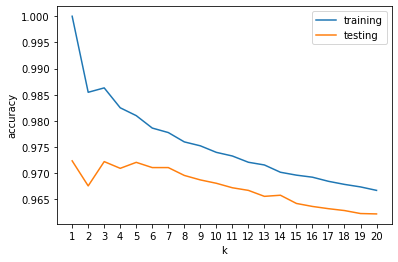

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
training_accuracies = []
testing_accuracies = []
k_values = range(1, 21)
for k in tqdm(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_accuracies.append(knn.score(X_train, y_train))
    testing_accuracies.append(knn.score(X_test, y_test))
plt.xticks(range(1, 21))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(k_values, training_accuracies, label="training")
plt.plot(k_values, testing_accuracies, label="testing")
plt.legend()
plt.show()

We will pick three(3) as the optimal k, as from that point onwards, both training and testing accuracy constantly decrease (with a lower rate, however).

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

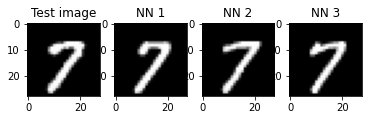

In [10]:
index = np.random.choice(X_test.shape[0])
image = X_test[index]
plt.subplot(1, 4, 1)
plt.imshow(image.reshape(28, 28), cmap="gray")
plt.title("Test image")
for i in range(3):
    plt.subplot(1, 4, i + 2)
    plt.imshow(X_train[knn.kneighbors([image], 3, return_distance=False)[0][i]].reshape(28, 28), cmap="gray")
    plt.title(f"NN {i + 1}")
plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [03:27<00:00, 10.36s/it]


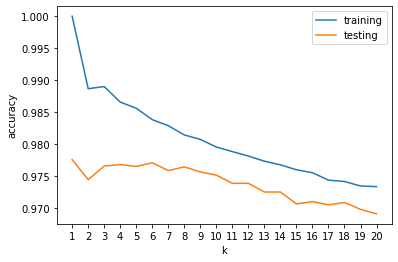

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

dimensionality_reduction = PCA(n_components=50) # this is the number of components that we kept at Worksheet10

training_accuracies = []
testing_accuracies = []
for k in tqdm(k_values):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    model = make_pipeline(dimensionality_reduction, knn_model)
    model.fit(X_train, y_train)
    training_accuracies.append(model.score(X_train, y_train))
    testing_accuracies.append(model.score(X_test, y_test))
plt.xticks(range(1, 21))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(k_values, training_accuracies, label="training")
plt.plot(k_values, testing_accuracies, label="testing")
plt.legend()
plt.show()

We applied PCA to retain the first 50 singular values based on the analysis of a singular value plot generated during worksheet10 for the same dataset. Through careful examination, we identified a 'knee' point, indicating diminishing returns in information gain beyond this threshold. Therefore, we expect minimal differences in model performance compared to the previous model, as we have preserved the majority of the information. However, we observed a significant improvement in runtime efficiency. The runtime without PCA was 48 minutes, whereas with dimensionality reduction, it reduced dramatically to only 3.5 minutes!

For completeness, we also generated a similar plot using only 10 singular values. Anticipating a reduction in accuracy compared to our previous analysis.

100%|██████████| 20/20 [05:05<00:00, 15.30s/it]


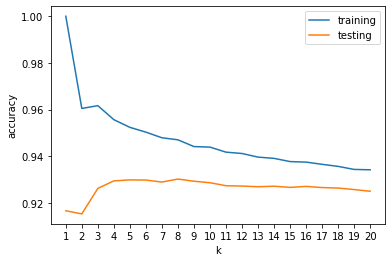

In [12]:
dimensionality_reduction = PCA(n_components=10) # this is the number of components that we kept at Worksheet10

training_accuracies = []
testing_accuracies = []
for k in tqdm(range(1, 21)):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    model = make_pipeline(dimensionality_reduction, knn_model)
    model.fit(X_train, y_train)
    training_accuracies.append(model.score(X_train, y_train))
    testing_accuracies.append(model.score(X_test, y_test))
plt.xticks(range(1, 21))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(range(1, 21), training_accuracies, label="training")
plt.plot(range(1, 21), testing_accuracies, label="testing")
plt.legend()
plt.show()

Indeed, we report a (slight) decrease in accuracy when we only obtain 10 singular values.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

First, lets take a look on the dataset, its rows and columns.

In [13]:
train_data = pd.read_csv('titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Even from the first 5 isntances of the dataset we can see that there are some columns (features) that are not that useful and/or contain missing values. We will now have a better look at the types of the features as well as the number of missing values for each feature.

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Based on this information, we will later remove 'Cabin' from our dataset as there are too many missing valeus that we do not know how to fill. On the other hand, although 'Age' and 'Embarked' contain missing values, we can efficiently fill them with the average age and the most frequent embarked value. Therefore, wwe are going to keep those.

In [15]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Below, we perform data preprocessing, implementing the following steps:
* Age is filled with the median.

* Embarked is filled with the most frequent value.

* Fare values are filled with the median.

* 'Cabin' is removed due to numerous NaN values.

* 'SibSp', 'Parch', and 'Fare' are removed as they are used to create new features.

* 'Name' and 'Ticket' are removed as they do not provide relevant information for our task.

* Replace male and female with 0 and 1 respectively. The knn classifier that we will aply requires this.

Additionaly, we will add two new features:
* 'FamilySize' which we can created by adding # of siblings / spouses and # of parents / children aboard the Titanic. We hope to capture the effect of having family members aboard the Titanic that may influence survival rates.

* 'FarePerPerson' which we can create by dividing the fare by the family size  To normalize the fare based on the number of individuals sharing the ticket. This could provide insights into the socio-economic status of passengers.

Now, we can also remove the features that we use in order to create these new features.

* Remove 'SibSp', 'Parch' and 'Fare

We are also going to remove 'Name' and 'Ticket' as they do not provide useful information for our task. On top of this, as these features contain characters, we would need to create embeddings in order to feed them into our model.

Last but not least, we can use an one-hot encoding to represent the 'Embarked' feature, as there are only 3 distinct values, hence we will (only) create 3 extra features. Each unique value of 'Embarked' will be True/False

In [16]:
def preprocess_data(data):
    # fill missing age values with median
    data['Age'].fillna(data['Age'].median(), inplace=True)
    # fill missing embarked values with mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    # fill missing fare values with median
    data['Fare'].fillna(data['Fare'].median(), inplace=True)
    # drop cabin as there are too many missing values
    data.drop('Cabin', axis=1, inplace=True)
    # convert Sex to binary
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    # create new feature FamilySize and drop the features that we used to create it
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
    # create new feature FarePerPerson and drop the feature that we used to create it
    data['FarePerPerson'] = data['Fare'] / data['FamilySize']
    data.drop('Fare', axis=1, inplace=True)
    # drop Name and Ticket as they are not useful and they also require additional processing to use them (embedding, etc.)
    data.drop('Name', axis=1, inplace=True)
    data.drop('Ticket', axis=1, inplace=True)
    # one-hot encode Embarked (create a new binary feature for each unique value of Embarked and drop the original feature)
    data = pd.get_dummies(data, columns=['Embarked'])
    return data

In [17]:
train_data = preprocess_data(train_data)

/var/folders/qf/yh559xpx4dv12z0mkyw5cvr80000gn/T/ipykernel_3487/3903775578.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/var/folders/qf/yh559xpx4dv12z0mkyw5cvr80000gn/T/ipykernel_3487/3903775578.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [18]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,FamilySize,FarePerPerson,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,2,3.62500,False,False,True
1,2,1,1,1,38.0,2,35.64165,True,False,False
2,3,1,3,1,26.0,1,7.92500,False,False,True
3,4,1,1,1,35.0,2,26.55000,False,False,True
4,5,0,3,0,35.0,1,8.05000,False,False,True


In [19]:
# split train data into train and test (this will serve as validation in order to pick the best model)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=42)

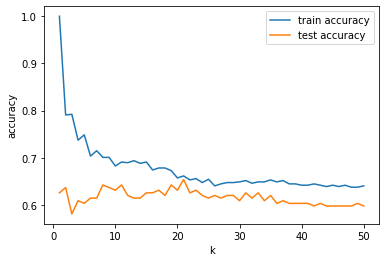

In [20]:
# we will plot the accuracy of the model on the training and testing set for different values of k to pick the best k
train_accuracy = []
test_accuracy = []
k_values = np.arange(1, 51)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_set.drop('Survived', axis=1), train_set['Survived'])
    train_accuracy.append(knn.score(train_set.drop('Survived', axis=1), train_set['Survived']))
    test_accuracy.append(knn.score(test_set.drop('Survived', axis=1), test_set['Survived'])
    )
plt.plot(k_values, train_accuracy, label='train accuracy')
plt.plot(k_values, test_accuracy, label='test accuracy')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Based on the above plot, we are going to pick 5 nearest neighbors, as from that point on, accuracy keeps decreasing in train, while only get slightly better on test.

In [21]:
test_data = pd.read_csv('titanic/test.csv')
test_data = preprocess_data(test_data)

/var/folders/qf/yh559xpx4dv12z0mkyw5cvr80000gn/T/ipykernel_3487/3903775578.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/var/folders/qf/yh559xpx4dv12z0mkyw5cvr80000gn/T/ipykernel_3487/3903775578.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [22]:
#apply kNN with best k(5) on test data to predict 'Survived'
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data.drop('Survived', axis=1), train_data['Survived'])
test_data['Survived'] = knn.predict(test_data)

In [23]:
test_data[['PassengerId', 'Survived']].to_csv('titanic/submission.csv', index=False)

We created two submission files, differing only in the choice of the number of nearest neighbors: one with k=5 and the other with k=7. Notably, the decision to use k=5 proved correct, as it resulted in an accuracy of 0.64, while increasing k to 7 led to a slight decrease in accuracy to 0.62.

https://www.kaggle.com/competitions/titanic/submissions